<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


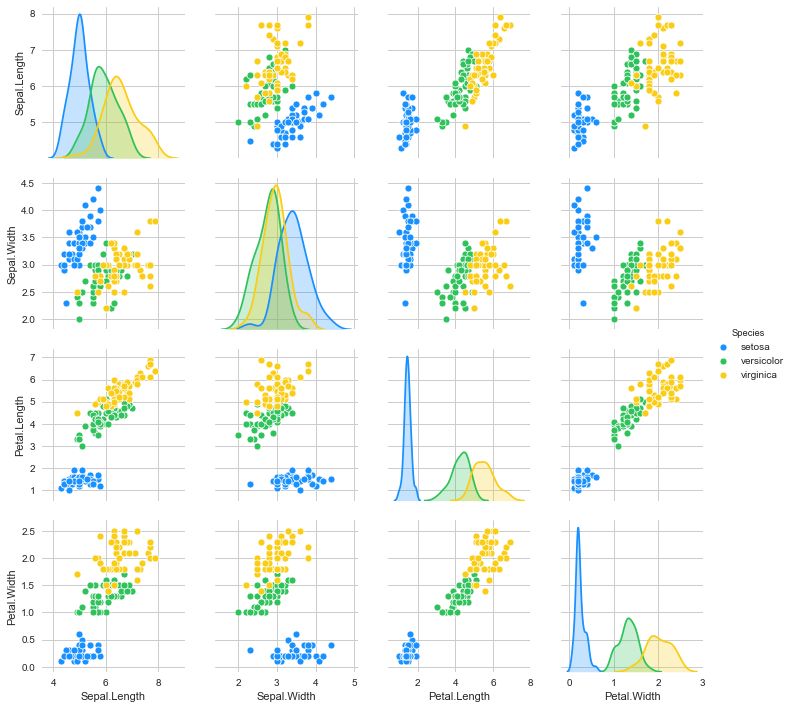

In [8]:
    # 导入相关包
import numpy as np
import pandas as pd
from pandas import plotting

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
iris = pd.read_csv('iris.csv', usecols=[1, 2, 3, 4, 5])
iris.info()
iris.head()
iris.describe()
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 
g = sns.pairplot(data=iris, palette=antV, hue= 'Species')


In [1]:
from adaboost import *
X, y = make_moons(n_samples=300, noise=0.2, random_state=3)
y[np.where(y == 0)] = -1
model = Adaboost(X, y, max_depth=1)
# model = Adaboost(X, y, base_classfier=LogisticRegression,penalty='l2')
# model = Adaboost(X, y, learning_rate=0.4, base_classfier=SVC)
for i in range(100):
    model.__next__(plot=True,plot_mode="3d")
model.contour_plot(make_gif=True,mode="3d")
print("GIF generated")

GIF generated


In [3]:
#make gif to show how alpha and score change
from adaboost import *
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
# model = Adaboost_Demonstration(X, y, base_classfier=LogisticRegression,penalty='l2',multi_class='auto',solver='lbfgs',learning_rate=0.6)
# model = Adaboost_Demonstration(X, y, learning_rate=0.08, base_classfier=SVC, gamma='auto',kernel='linear')
model = Adaboost(X_train, y_train, max_depth=1)
for i in range(100):
    model.__next__(plot=False)
    model.plot_attrs('alphas',(0,100),(1.3,2.8))
    model.plot_attrs('scores',(0,100),(0.6,1.1))
    model.plot_attrs('predictions',(0,100),(0,1))
    model.plot_attrs('sample_weight',(0,105),(0,0.3))
imgs=[]
for i in range(len(os.listdir('alphas'))):
    imgs.append(imageio.imread('alphas/'+str(i)+'.png'))
imageio.mimsave('alpha.gif',imgs,'GIF',duration=0.1)
imgs=[]
for i in range(len(os.listdir('scores'))):
    imgs.append(imageio.imread('scores/'+str(i)+'.png'))
imageio.mimsave('scores.gif',imgs,'GIF',duration=0.1)
imgs=[]
for i in range(len(os.listdir('predictions'))):
    imgs.append(imageio.imread('predictions/'+str(i)+'.png'))
imageio.mimsave('predictions.gif',imgs,'GIF',duration=0.1)
imgs=[]
for i in range(len(os.listdir('sample_weight'))):
    imgs.append(imageio.imread('sample_weight/'+str(i)+'.png'))
imageio.mimsave('sample_weight.gif',imgs,'GIF',duration=0.1)
print("GIF generated")

GIF generated


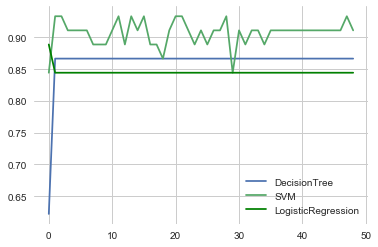

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
dt_score=[]
svc_score=[]
knn_score=[]
lr_score=[]
for n in range(1,50):
    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=1)

    model = abc_dt.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    dt_score.append(metrics.accuracy_score(y_test, y_pred))

    svc=SVC(probability=True, kernel='linear')
    abc_svc =AdaBoostClassifier(n_estimators=n, base_estimator=svc,learning_rate=1)
    model = abc_svc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    svc_score.append(metrics.accuracy_score(y_test, y_pred))
    
#     knn = KNeighborsClassifier()
#     abc_knn =AdaBoostClassifier(n_estimators=n, base_estimator=knn,learning_rate=1)
#     model = abc_knn.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     knn_score.append(metrics.accuracy_score(y_test, y_pred))
    
    lr = LogisticRegression(penalty='l2',multi_class='auto',solver='lbfgs')
    abc_lr =AdaBoostClassifier(n_estimators=n, base_estimator=lr,learning_rate=1)
    model = abc_lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    lr_score.append(metrics.accuracy_score(y_test, y_pred))
xx=list(range(len(dt_score)))
plt.plot(xx,dt_score,label='DecisionTree')
plt.plot(xx,svc_score,label='SVM')
plt.plot(xx,lr_score,  color='green',label='LogisticRegression')
plt.legend() 
plt.savefig('compare.png')
print("Image generated")



Image generated


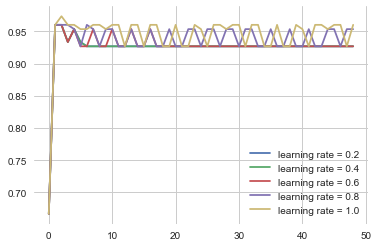

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

score_0_2=[]
score_0_4=[]
score_0_6=[]
score_0_8=[]
score_1_0=[]
for n in range(1,50):
    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=0.2)
    model = abc_dt.fit(X, y)
    y_pred = model.predict(X)
    score_0_2.append(metrics.accuracy_score(y, y_pred))
    
    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=0.2)
    model = abc_dt.fit(X, y)
    y_pred = model.predict(X)
    score_0_4.append(metrics.accuracy_score(y, y_pred))

    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=0.4)
    model = abc_dt.fit(X, y)
    y_pred = model.predict(X)
    score_0_6.append(metrics.accuracy_score(y, y_pred))
    
    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=0.6)
    model = abc_dt.fit(X, y)
    y_pred = model.predict(X)
    score_0_8.append(metrics.accuracy_score(y, y_pred))
    
    abc_dt = AdaBoostClassifier(n_estimators=n,
                             learning_rate=0.8)
    model = abc_dt.fit(X, y)
    y_pred = model.predict(X)
    score_1_0.append(metrics.accuracy_score(y, y_pred))
    
    
    


xx=list(range(len(score_0_2)))
plt.plot(xx,score_0_2,label='learning rate = 0.2')
plt.plot(xx,score_0_4,label='learning rate = 0.4')
plt.plot(xx,score_0_6,label='learning rate = 0.6')
plt.plot(xx,score_0_8,label='learning rate = 0.8')
plt.plot(xx,score_1_0,label='learning rate = 1.0')

plt.legend() 
plt.savefig('learing rate.png')
print("Image generated")